In [1]:
%matplotlib inline

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [4]:
IMG_DIM = (150, 150) #이미지 크기 축소

train_files = glob.glob('D:\Study\Books\Transfer\data/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('D:\Study\Books\Transfer\data/val_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, #
      '\tValidation dataset shape:', validation_imgs.shape)
#Train dataset shape: (3000, 150, 150, 3)        Validation dataset shape: (1000, 150, 150, 3)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [5]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


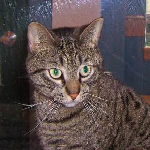

In [6]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [7]:
#파라미터 내 마음대로 설정
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder


# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

le.fit(validation_labels)
validation_labels_enc = le.transform(validation_labels)

['training_data\\cat', 'training_data\\cat', 'training_data\\cat', 'training_data\\cat', 'training_data\\cat', 'training_data\\dog', 'training_data\\dog', 'training_data\\dog', 'training_data\\dog', 'training_data\\dog'] [0 0 0 0 0 1 1 1 1 1]


In [8]:
#모델링
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 4s 1ms/sample - loss: 1.0133 - acc: 0.5583 - val_loss: 0.6384 - val_acc: 0.6640
Epoch 2/30
3000/3000 [==============================] - 2s 688us/sample - loss: 0.6340 - acc: 0.6630 - val_loss: 0.5850 - val_acc: 0.7060
Epoch 3/30
3000/3000 [==============================] - 2s 717us/sample - loss: 0.5421 - acc: 0.7257 - val_loss: 0.5809 - val_acc: 0.7210
Epoch 4/30
3000/3000 [==============================] - 2s 714us/sample - loss: 0.4601 - acc: 0.7827 - val_loss: 0.7489 - val_acc: 0.6330
Epoch 5/30
3000/3000 [==============================] - 2s 699us/sample - loss: 0.3885 - acc: 0.8217 - val_loss: 0.5686 - val_acc: 0.7680
Epoch 6/30
3000/3000 [==============================] - 2s 689us/sample - loss: 0.3052 - acc: 0.8653 - val_loss: 0.5618 - val_acc: 0.7500
Epoch 7/30
3000/3000 [==============================] - 2s 690us/sample - loss: 0.2377 - acc: 0.8990 - val_loss: 0.6587 - val_

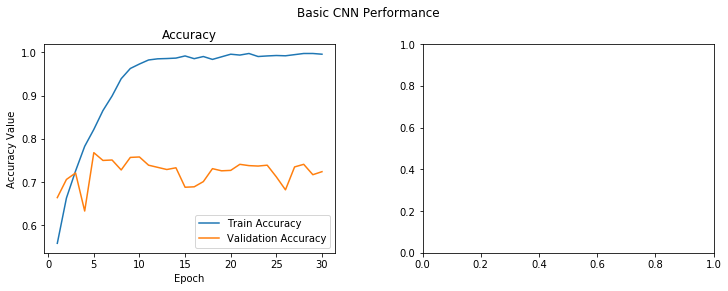

In [9]:
#결과 및 fit
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

#섬세한 추척
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
plt.show()

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.show()